In [41]:
import numerapi
import requests

#look at the /look_back_rounds/ most recent rounds and compute distance squared from your model for correlation vectors, find the lowest distance between your model and another in the top \leaderboard_count\ models excluding any \banned_models\
leaderboard_count = 25
look_back_rounds = 5
model = "benschailr_low"
banned_models = ["benschailr_high","bensch_a"]

In [42]:
lowest_square_distance_name = numerapi.NumerAPI().get_leaderboard(1)[0]["username"]
lowest_square_distance_value = 1000000000000000000000000000
print(lowest_square_distance_name)
responseModel = requests.get("https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ model +"\"){latestRoundPerformances{correlation}}}").json()['data']['v2UserProfile']['latestRoundPerformances']
for user in numerapi.NumerAPI().get_leaderboard(leaderboard_count):
    
    if(user["username"] in banned_models):
        continue
    distance_square = 0
    response = requests.get("https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ user["username"] +"\"){latestRoundPerformances{correlation}}}").json()['data']['v2UserProfile']['latestRoundPerformances']
    for i in range(look_back_rounds):
        other = response[-1 - i]["correlation"]
        if(other == None):
            other = 1000
        distance_square += (other - responseModel[-1-i]["correlation"])**2
    if distance_square < lowest_square_distance_value:
        lowest_square_distance_value = distance_square
        lowest_square_distance_name = user["username"]



benben11


KeyboardInterrupt: 

In [45]:
print(lowest_square_distance_name,lowest_square_distance_value)


houshou 0.002748486544664979


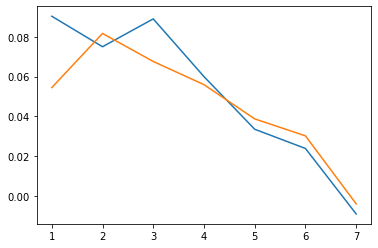

In [49]:
import matplotlib.pyplot as plt
x = []
y1 = []
y2 = []
responseB = requests.get("https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ lowest_square_distance_name +"\"){latestRoundPerformances{correlation}}}").json()['data']['v2UserProfile']['latestRoundPerformances']
responseA = requests.get("https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ model +"\"){latestRoundPerformances{correlation}}}").json()['data']['v2UserProfile']['latestRoundPerformances']
for i in range(look_back_rounds):
    x.append(look_back_rounds-i)
    y1.append(responseA[-1 - i]["correlation"])
    y2.append(responseB[-1 - i]["correlation"])
plt.plot(x,y1)
plt.ion()
plt.plot(x,y2)
